 # Boosting algorithms implementation using Mobile Money

<img src="Zindi_header.JPG">

### Project Description

The objective of this competition is to create a machine learning model to predict which individuals are most likely to use mobile money and other financial services (savings, credit, and insurance). This is a multiclass classification problem.

(1) no_financial_services (2) other_only (3) mm_only (4) mm_plus

 ### Importing python modules

In [1]:
import os
import numpy as np 
import pandas as pd 
import pandas_profiling as pf 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

%matplotlib inline

### Dataset Download

<img src="Zindi_data_page.JPG">

### Loading the train and test  datasets

In [2]:
train = pd.read_csv('training.csv')
print("shape of train dataset = ", train.shape)

shape of train dataset =  (7094, 37)


In [3]:
test = pd.read_csv('test.csv')
print("Shape of test dataset = ", test.shape)

Shape of test dataset =  (2365, 32)


### Information about the features

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

### Code Book

In [5]:
from IPython.display import IFrame
IFrame("Variable_Codebook.pdf", width=800, height=500)

### Viewing top 5 records

In [6]:
train.head(3)

ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8_1  Q8_2  ...  Q17  Q18  Q19  Latitude  \
0  5086  98   2   3   1   1   2   2     0     0  ...   -1    4    4 -4.460442   
1  1258  40   1   1   3   5   1   1     1     0  ...    4    1    4 -6.176438   
2   331  18   2   4   6   3   2   1     0     0  ...   -1    1    1 -6.825702   

   Longitude  mobile_money  savings  borrowing  insurance  \
0  29.811396             0        0          0          0   
1  39.244871             1        1          1          0   
2  37.652798             1        0          0          0   

   mobile_money_classification  
0                            0  
1                            3  
2                            2  

[3 rows x 37 columns]

### Descriptive statistics on the features

In [7]:
train.describe()

ID           Q1           Q2           Q3           Q4  \
count  7094.000000  7094.000000  7094.000000  7094.000000  7094.000000   
mean   4742.627291    38.239498     1.559910     1.787426     3.060051   
std    2731.120086    16.332148     0.496433     1.165160     1.557779   
min       1.000000    16.000000     1.000000     1.000000     1.000000   
25%    2397.250000    25.000000     1.000000     1.000000     2.000000   
50%    4744.500000    35.000000     2.000000     1.000000     3.000000   
75%    7105.000000    48.000000     2.000000     3.000000     3.000000   
max    9459.000000   100.000000     2.000000     4.000000     8.000000   

                Q5           Q6           Q7         Q8_1         Q8_2  ...  \
count  7094.000000  7094.000000  7094.000000  7094.000000  7094.000000  ...   
mean      2.548915     1.840569     1.397942     0.062165     0.630110  ...   
std       1.534257     0.366103     0.489508     0.241472     0.482809  ...   
min       1.000000     1.000000     1.000000     0.000000     0.000000  ...   
25%       1.000000     2.000000     1.000000     0.000000     0.000000  ...   
50%       3.000000     2.000000     1.000000     0.000000     1.000000  ...   
75%       4.000000     2.000000     2.000000     0.000000     1.000000  ...   
max       6.000000     2.000000     2.000000     1.000000     1.000000  ...   

               Q17          Q18          Q19     Latitude    Longitude  \
count  7094.000000  7094.000000  7094.000000  7094.000000  7094.000000   
mean     -0.431914     1.860164     3.163378    -6.034378    35.354029   
std       1.489879     1.351372     1.317691     2.720888     2.899511   
min      -1.000000     1.000000     1.000000   -11.467463    29.639578   
25%      -1.000000     1.000000     2.000000    -8.275387    32.935429   
50%      -1.000000     1.000000     4.000000    -6.087854    35.073326   
75%      -1.000000     4.000000     4.000000    -3.517053    38.351815   
max       5.000000     5.000000     5.000000    -1.084000    40.258744   

       mobile_money      savings    borrowing    insurance  \
count   7094.000000  7094.000000  7094.000000  7094.000000   
mean       0.553989     0.461517     0.432901     0.151255   
std        0.497112     0.498552     0.495512     0.358322   
min        0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000   
50%        1.000000     0.000000     0.000000     0.000000   
75%        1.000000     1.000000     1.000000     0.000000   
max        1.000000     1.000000     1.000000     1.000000   

       mobile_money_classification  
count                  7094.000000  
mean                      1.799267  
std                       1.196955  
min                       0.000000  
25%                       1.000000  
50%                       2.000000  
75%                       3.000000  
max                       3.000000  

[8 rows x 37 columns]

### Listing features of Interest

In [8]:
# Train
cols_Train = ['mobile_money_classification','ID' #,'Latitude','Longitude' 
               ,'Q1','Q2','Q3','Q4','Q5','Q6','Q7'
               ,'Q8_1','Q8_2','Q8_3','Q8_4','Q8_5','Q8_6','Q8_7','Q8_8','Q8_9','Q8_10','Q8_11'
               ,'Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19'
       ]        

In [9]:
# Test
cols_Test =  ['ID' #,'Latitude','Longitude'
               ,'Q1','Q2','Q3','Q4','Q5','Q6','Q7'
               ,'Q8_1','Q8_2','Q8_3','Q8_4','Q8_5','Q8_6','Q8_7','Q8_8','Q8_9','Q8_10','Q8_11'
               ,'Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19'
             ]       

### Selecting features of Interest

In [10]:
train = train[cols_Train]
print("shape of train dataset = ", train.shape)

shape of train dataset =  (7094, 31)


In [11]:
test = test[cols_Test]
print("shape of train dataset = ", test.shape)

shape of train dataset =  (2365, 30)


### Features Renaming

In [12]:
train.rename({'Q1':'age','Q2':'gender','Q3':'marital_status','Q4':'education','Q5':'Land_Ownership'
             ,'Q6':'land_ownership_YN','Q7':'Handset_YN','Q8_1':'Salary_YN','Q8_2':'Trader_YN'
             ,'Q8_3':'Artisan_YN','Q8_4':'Casual_YN','Q8_5':'rental_income_YN'
             ,'Q8_6':'Saving_Interest','Q8_7':'Pensioner_YN', 'Q8_8':'Social_Grant'
             ,'Q8_9':'DependantA','Q8_10':'DependantB','Q8_11':'Other_Income'
             ,'Q9':'Salary_Work_Type','Q10':'Trader_Work_Type','Q11':'Artisan_Work_Type'
             ,'Q12':'Sent_Money_YN','Q13':'Sent_Money_Cat','Q14':'Received_Money_YN'
             ,'Q15':'Received_Money_Cat','Q16':'Mobile_Money_4_Purchase'
             ,'Q17':'Mobile_Money_4_Bills','Q18':'Literacy_Vernacular','Q19':'Literacy_English'
             }, axis=1, inplace=True)

In [13]:
test.rename({'Q1':'age','Q2':'gender','Q3':'marital_status','Q4':'education','Q5':'Land_Ownership'
             ,'Q6':'land_ownership_YN','Q7':'Handset_YN','Q8_1':'Salary_YN','Q8_2':'Trader_YN'
             ,'Q8_3':'Artisan_YN','Q8_4':'Casual_YN','Q8_5':'rental_income_YN'
             ,'Q8_6':'Saving_Interest','Q8_7':'Pensioner_YN', 'Q8_8':'Social_Grant'
             ,'Q8_9':'DependantA','Q8_10':'DependantB','Q8_11':'Other_Income'
             ,'Q9':'Salary_Work_Type','Q10':'Trader_Work_Type','Q11':'Artisan_Work_Type'
             ,'Q12':'Sent_Money_YN','Q13':'Sent_Money_Cat','Q14':'Received_Money_YN'
             ,'Q15':'Received_Money_Cat','Q16':'Mobile_Money_4_Purchase'
             ,'Q17':'Mobile_Money_4_Bills','Q18':'Literacy_Vernacular','Q19':'Literacy_English'
             }, axis=1, inplace=True)

### Outcome Feature

Class 0: 1386
Class 1: 1778
Class 2: 804
Class 3: 3126


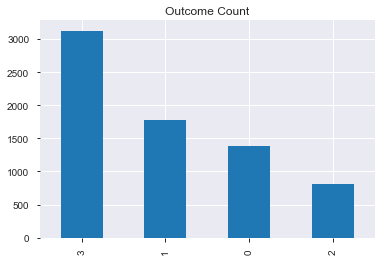

In [14]:
outcome_count = train.mobile_money_classification.value_counts()
print('Class 0:', outcome_count[0])
print('Class 1:', outcome_count[1])
print('Class 2:', outcome_count[2])
print('Class 3:', outcome_count[3])

outcome_count.plot(kind='bar', title='Outcome Count');

### Pandas Profiling

In [15]:
pf.ProfileReport(train)

### Dataset preparation for model building

In [16]:
ids  = test['ID']
test = test.drop(['ID'],axis = 1)

In [17]:
y = train['mobile_money_classification']
X = train[test.columns.values]

print("Y shape : ", y.shape)
print("X shape : ", X.shape)

Y shape :  (7094,)
X shape :  (7094, 29)


### Data Splitting

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1978)

In [19]:
print('y_train', y_train.shape)
print('X_train', X_train.shape)
print('y_test', y_test.shape)
print('X_test', X_test.shape)

y_train (4965,)
X_train (4965, 29)
y_test (2129,)
X_test (2129, 29)


### Model Trainig

### XGBoost Classifier

In [20]:
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict_proba(X_test)
# Evaluation metric result
print('Evaluatuion Result = ',np.round(log_loss(y_test, pred),5))

Evaluatuion Result 0.78804


### Light GBM Classifier

In [22]:
from lightgbm import LGBMClassifier

In [28]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
pred = lgbm.predict_proba(X_test)
# Evaluation metric result
print('Evaluatuion Result = ',np.round(log_loss(y_test, pred),5))

Evaluatuion Result =  0.82264


### Adaboost Classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
pred = ada.predict_proba(X_test)
# Evaluation metric result
print('Evaluatuion Result = ',np.round(log_loss(y_test, pred),5))

Evaluatuion Result =  1.33931


### CatBoost Classifier

In [35]:
from catboost import CatBoostClassifier

In [37]:
cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train, y_train)
pred = cat.predict_proba(X_test)
# Evaluation metric result
print('Evaluatuion Result = ',np.round(log_loss(y_test, pred),5))

Evaluatuion Result =  0.79046


#### Making predicition for the test dataset using the best model (XGBoost)

In [31]:
test_preds = xgb.predict_proba(test)

In [33]:
final_prediction = pd.DataFrame(test_preds,columns=["Class_"+str(i) for i in range(1,5)])
final_prediction.insert(loc=0, column='ID', value=ids)
final_prediction = output.rename(columns={'Class_1': 'no_financial_services', 'Class_2': 'other_only', 'Class_3': 'mm_only', 'Class_4': 'mm_plus'})

In [34]:
#Top 5 Results
final_prediction.head()

ID  no_financial_services  other_only   mm_only   mm_plus
0  2352               0.002655    0.004156  0.194901  0.798289
1  8208               0.027268    0.061036  0.200067  0.711629
2  2785               0.002499    0.014065  0.114757  0.868678
3  2967               0.379954    0.542686  0.032871  0.044490
4  1697               0.002043    0.006055  0.132197  0.859706

### Submission

In [38]:

output.to_csv('Mobile Money Prediction.csv', index=False)

### Advance way of Solving the Problem

In [39]:
IFrame("https://medium.com/analytics-vidhya/5th-place-solution-mobile-money-and-financial-inclusion-in-tanzania-challenge-16e43e4d18f8", width=1000, height=500)